In [1]:
#import first all
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#this dataset is titanic data ...which is already in colab

df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# clean the dataset or remove duplicates
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
survived         0
pclass           0
sex              0
age            17

In [4]:
#drop or fix values
df_clean = df.dropna(subset=['age', 'embarked'])
df_clean = df_clean[['survived', 'pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]  # select relevant columns
df_clean['sex'] = df_clean['sex'].map({'male': 0, 'female': 1})  # convert categorical to numeric
df_clean.head()

,survived,pclass,sex,age,fare,sibsp,parch
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,0
4,0,3,0,35.0,8.0500,0,0


In [5]:
# correlation in this dataset
corr_matrix = df_clean.corr()
print(corr_matrix)


          survived    pclass       sex       age      fare     sibsp     parch
survived  1.000000 -0.356462  0.536762 -0.082446  0.266100 -0.015523  0.095265
pclass   -0.356462  1.000000 -0.150826 -0.365902 -0.552893  0.065187  0.023666
sex       0.536762 -0.150826  1.000000 -0.099037  0.182457  0.106296  0.249543
age      -0.082446 -0.365902 -0.099037  1.000000  0.093143 -0.307351 -0.187896
fare      0.266100 -0.552893  0.182457  0.093143  1.000000  0.139860  0.206624
sibsp    -0.015523  0.065187  0.106296 -0.307351  0.139860  1.000000  0.383338
parch     0.095265  0.023666  0.249543 -0.187896  0.206624  0.383338  1.000000


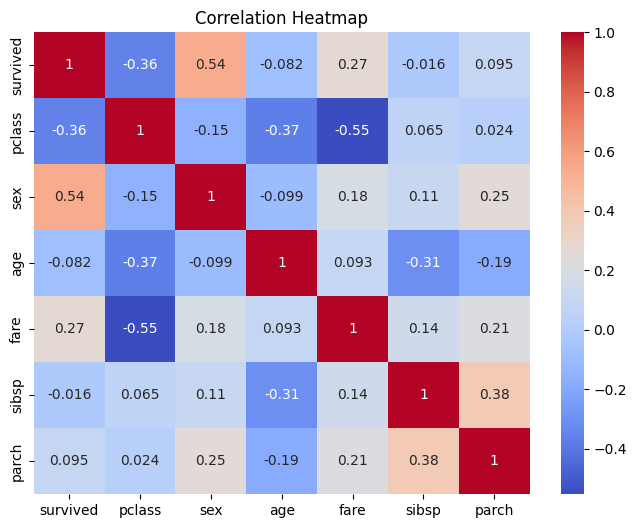

In [6]:
#heatmap of this dataset
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


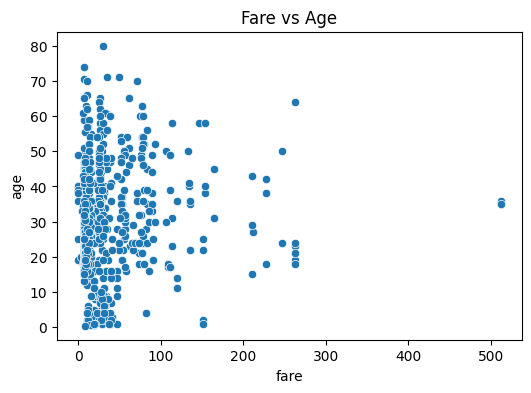

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='fare', y='age', data=df_clean)
plt.title('Fare vs Age')
plt.show()
